In [30]:
from pathlib import Path
import pandas as pd
import seaborn as sns

In [31]:
PATH_DATASET = Path("../datasets")
lead = pd.read_csv(PATH_DATASET / "raw" / "leads.csv")
lead.head()

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,NaN,Corporate Events,Inbound,Nurturing,Not Fit,NaN,2018-05-26,0,Chicago
1,NaN,Taylor1 Harris1,NaN,Inbound,Discarded,Not feeling,Event Management Guide,2018-10-17,0,Denver
2,hbzt0kp1,Alex6 Jackson3,NaN,Inbound,Nurturing,Competitor,NaN,2019-03-29,0,Denver
3,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,NaN,2018-05-26,0,NaN
4,NaN,Drew5 Wilson5,Corporate Events,Inbound,Nurturing,Competitor,NaN,2018-10-17,0,NaN


In [32]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61639 entries, 0 to 61638
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Id                          43972 non-null  object
 1   First Name                  53240 non-null  object
 2   Use Case                    44918 non-null  object
 3   Source                      60293 non-null  object
 4   Status                      61639 non-null  object
 5   Discarded/Nurturing Reason  45169 non-null  object
 6   Acquisition Campaign        25047 non-null  object
 7   Created Date                61639 non-null  object
 8   Converted                   61639 non-null  int64 
 9   City                        34929 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.7+ MB


In [33]:
lead.describe(include="all")

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
count,43972,53240,44918,60293,61639,45169,25047,61639,61639.000000,34929
unique,43972,53240,5,6,12,13,71,591,NaN,20
top,23okrabh,Taylor1 Harris1,Corporate Events,Inbound,Nurturing,Not Target,VirtualMeetups,2019-06-29,NaN,Chicago
freq,1,1,30485,38817,24060,12408,5884,1062,NaN,8170
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094583,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292640,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


<AxesSubplot: >

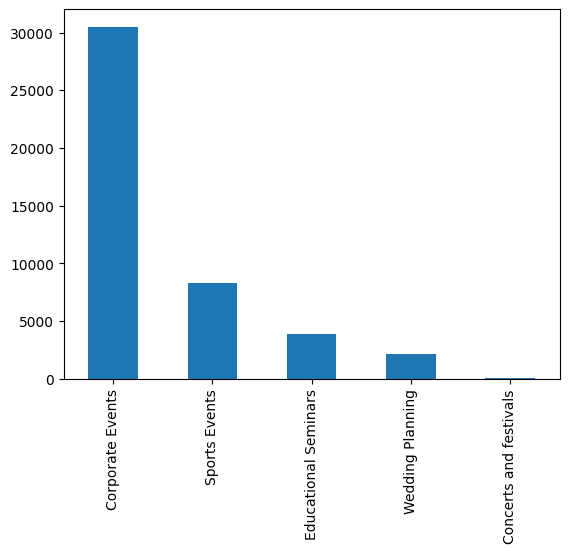

In [34]:
lead["Use Case"].value_counts().plot(kind="bar")

<AxesSubplot: >

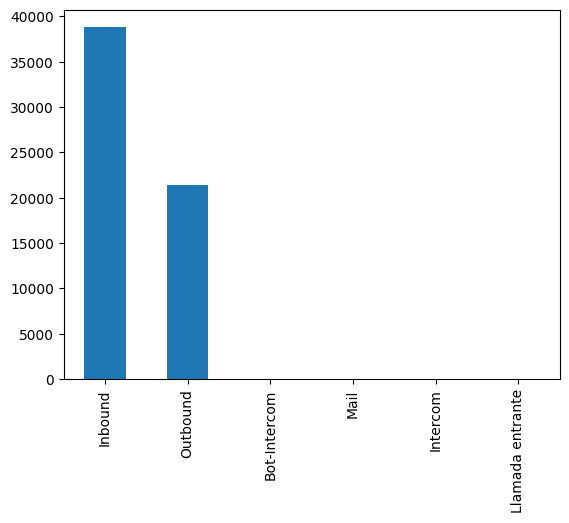

In [35]:
lead["Source"].value_counts().plot(kind="bar")

<AxesSubplot: >

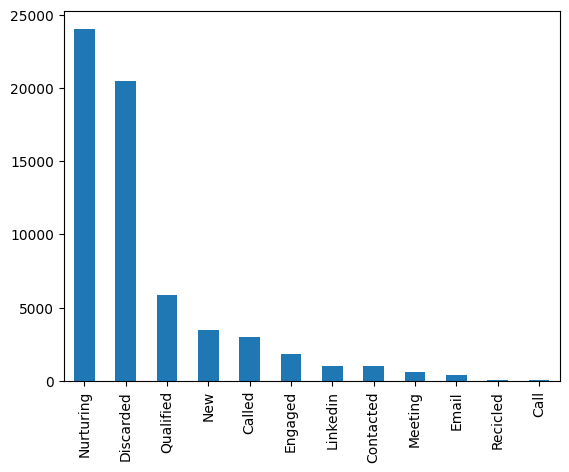

In [36]:
lead["Status"].value_counts().plot(kind="bar")

<AxesSubplot: >

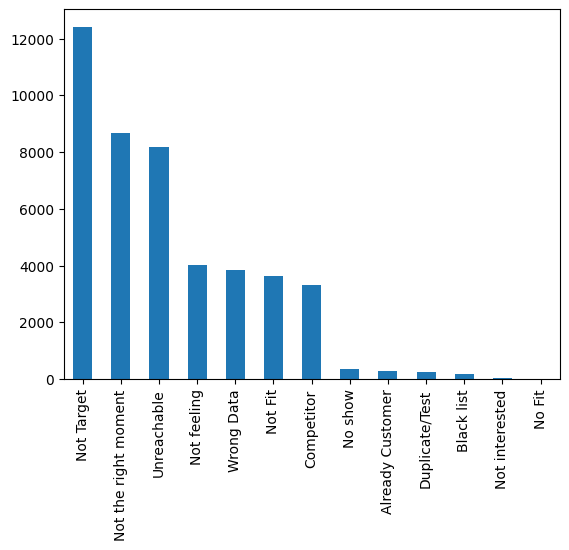

In [37]:
lead["Discarded/Nurturing Reason"].value_counts().plot(kind="bar")

<AxesSubplot: >

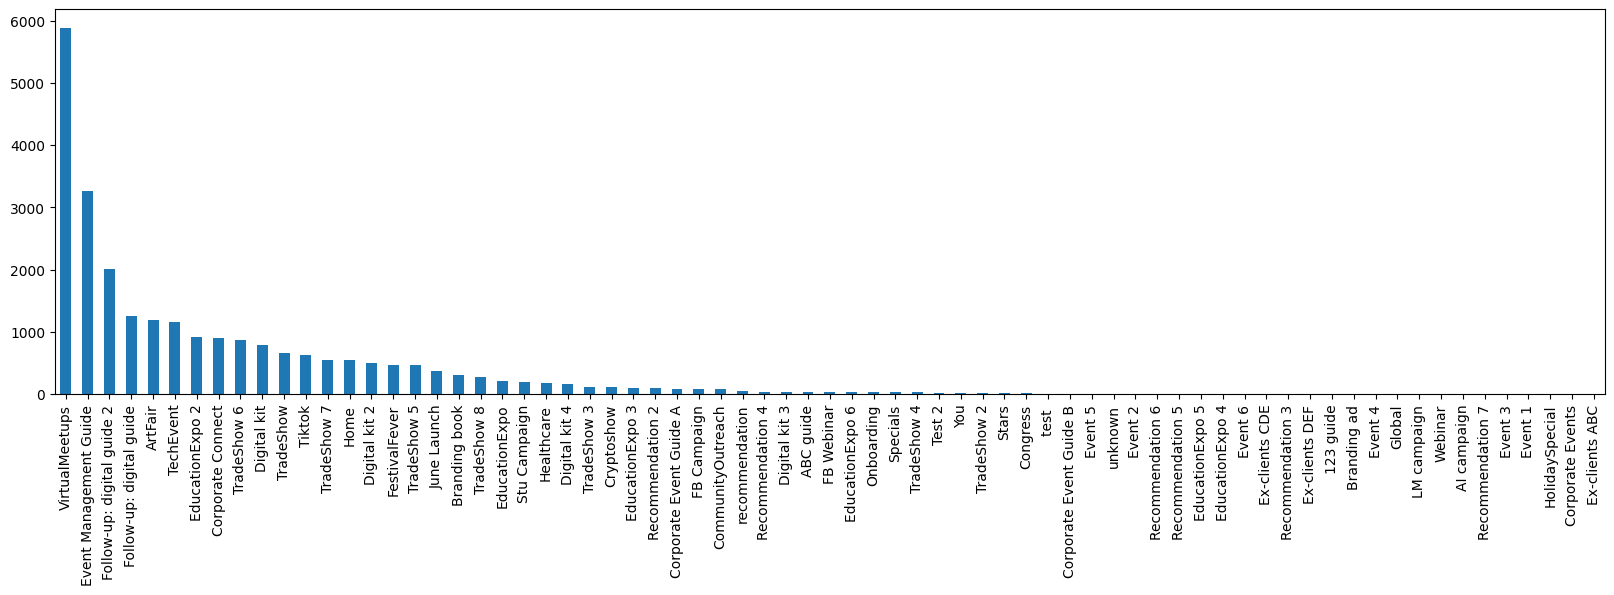

In [38]:
lead["Acquisition Campaign"].value_counts().plot(kind="bar", figsize=(20, 5))

<AxesSubplot: >

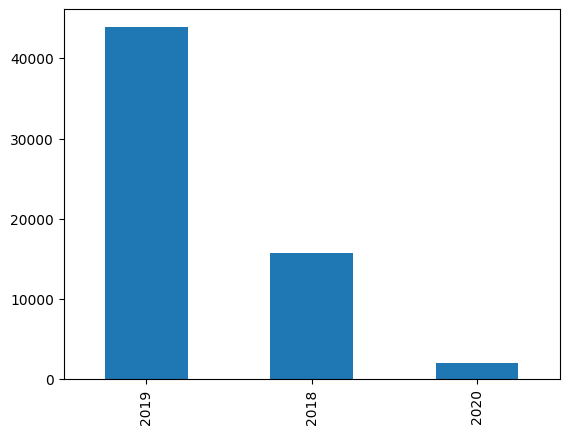

In [39]:
lead["Created Date"] = pd.to_datetime(lead["Created Date"])
lead["Created Date"].dt.year.value_counts().plot(kind="bar")

In [40]:
lead["Created Date"].head()

0   2018-05-26
1   2018-10-17
2   2019-03-29
3   2018-05-26
4   2018-10-17
Name: Created Date, dtype: datetime64[ns]

<AxesSubplot: >

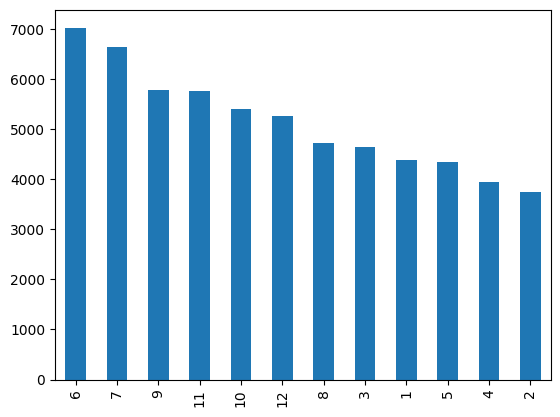

In [41]:
lead["Created Date"].dt.month.value_counts().plot(kind="bar")

<AxesSubplot: >

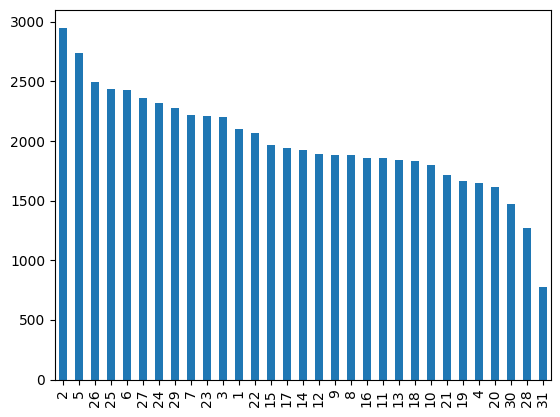

In [42]:
lead["Created Date"].dt.day.value_counts().plot(kind="bar")

<AxesSubplot: >

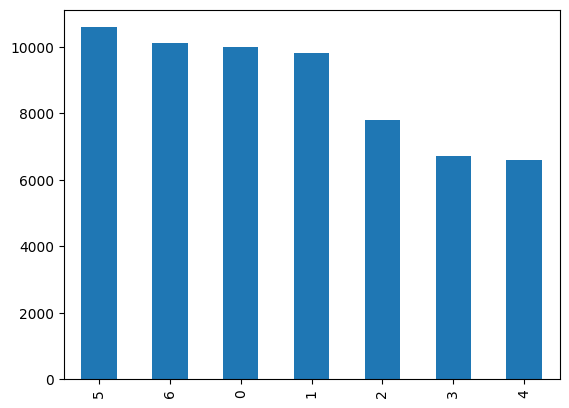

In [43]:
lead["Created Date"].dt.weekday.value_counts().plot(kind="bar")

<AxesSubplot: >

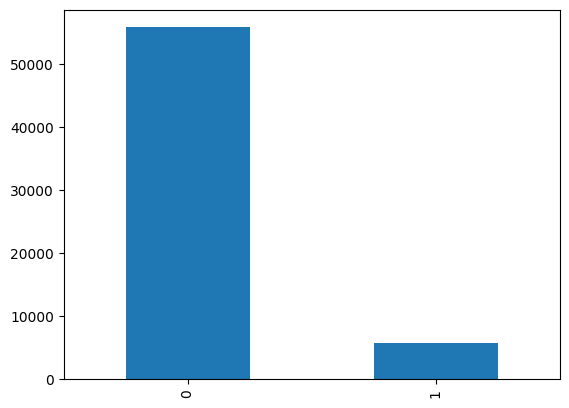

In [44]:
lead["Converted"].value_counts().plot(kind="bar")

<AxesSubplot: >

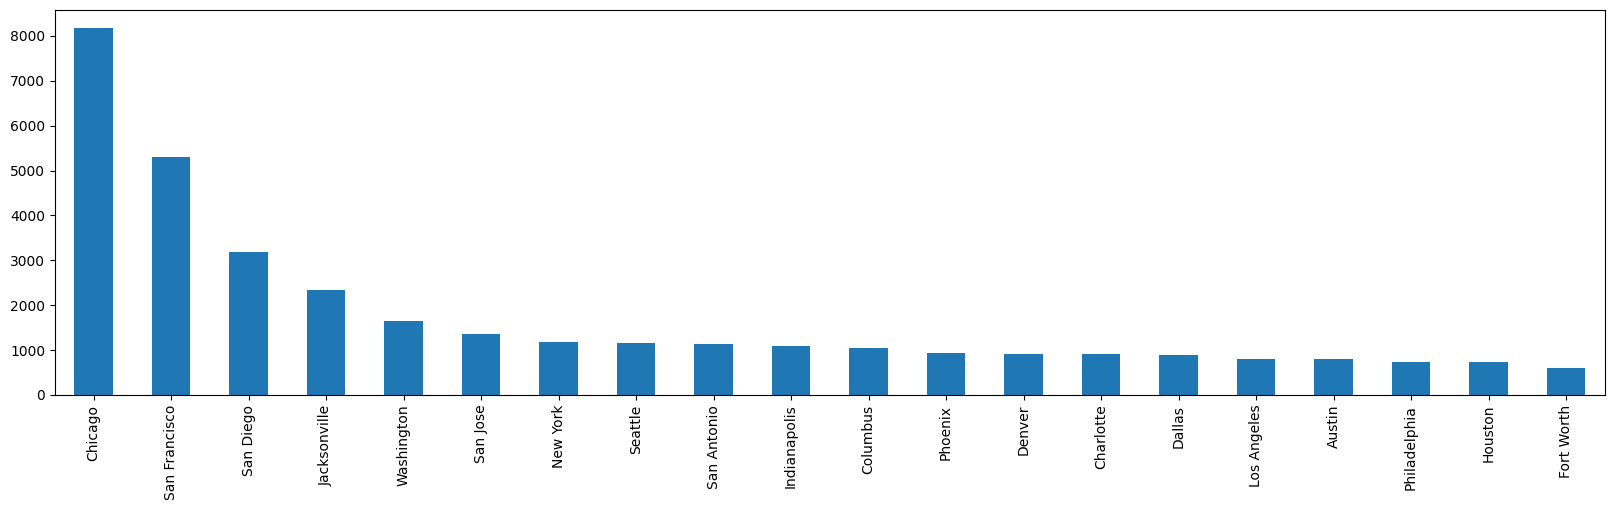

In [45]:
lead["City"].value_counts().plot(kind="bar", figsize=(20, 5))

In [46]:
lead["day"] = lead["Created Date"].dt.day
lead["month"] = lead["Created Date"].dt.month
lead["year"] = lead["Created Date"].dt.year
lead["weekday"] = lead["Created Date"].dt.weekday

lead.drop(columns=["Created Date"], inplace=True)

# Análisis de valores nulos

In [47]:
percentaje = lead.isnull().sum() / lead.shape[0] * 100
print(percentaje)

Id                            28.662048
First Name                    13.626113
Use Case                      27.127306
Source                         2.183682
Status                         0.000000
Discarded/Nurturing Reason    26.720096
Acquisition Campaign          59.365012
Converted                      0.000000
City                          43.332955
day                            0.000000
month                          0.000000
year                           0.000000
weekday                        0.000000
dtype: float64


<AxesSubplot: >

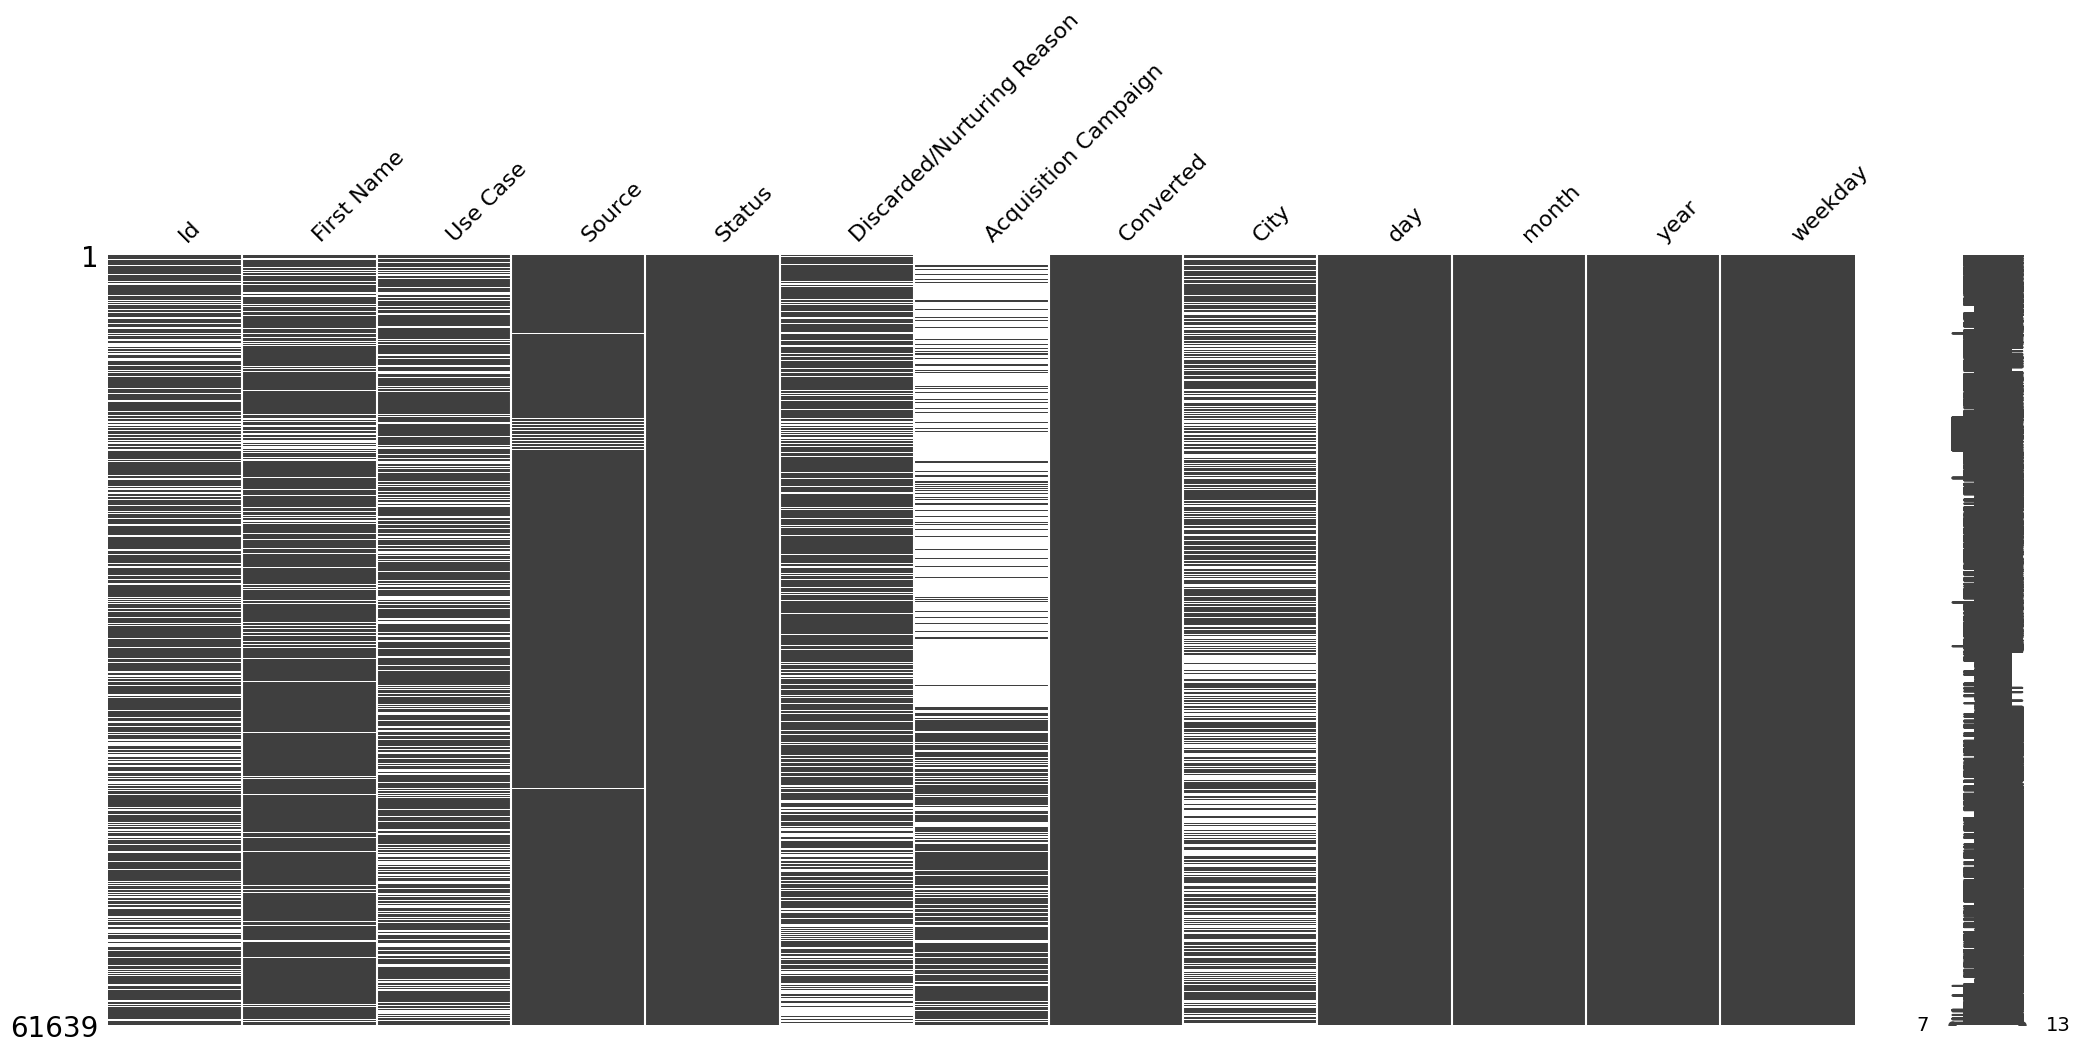

In [48]:
import missingno as msno
msno.matrix(lead)

<AxesSubplot: >

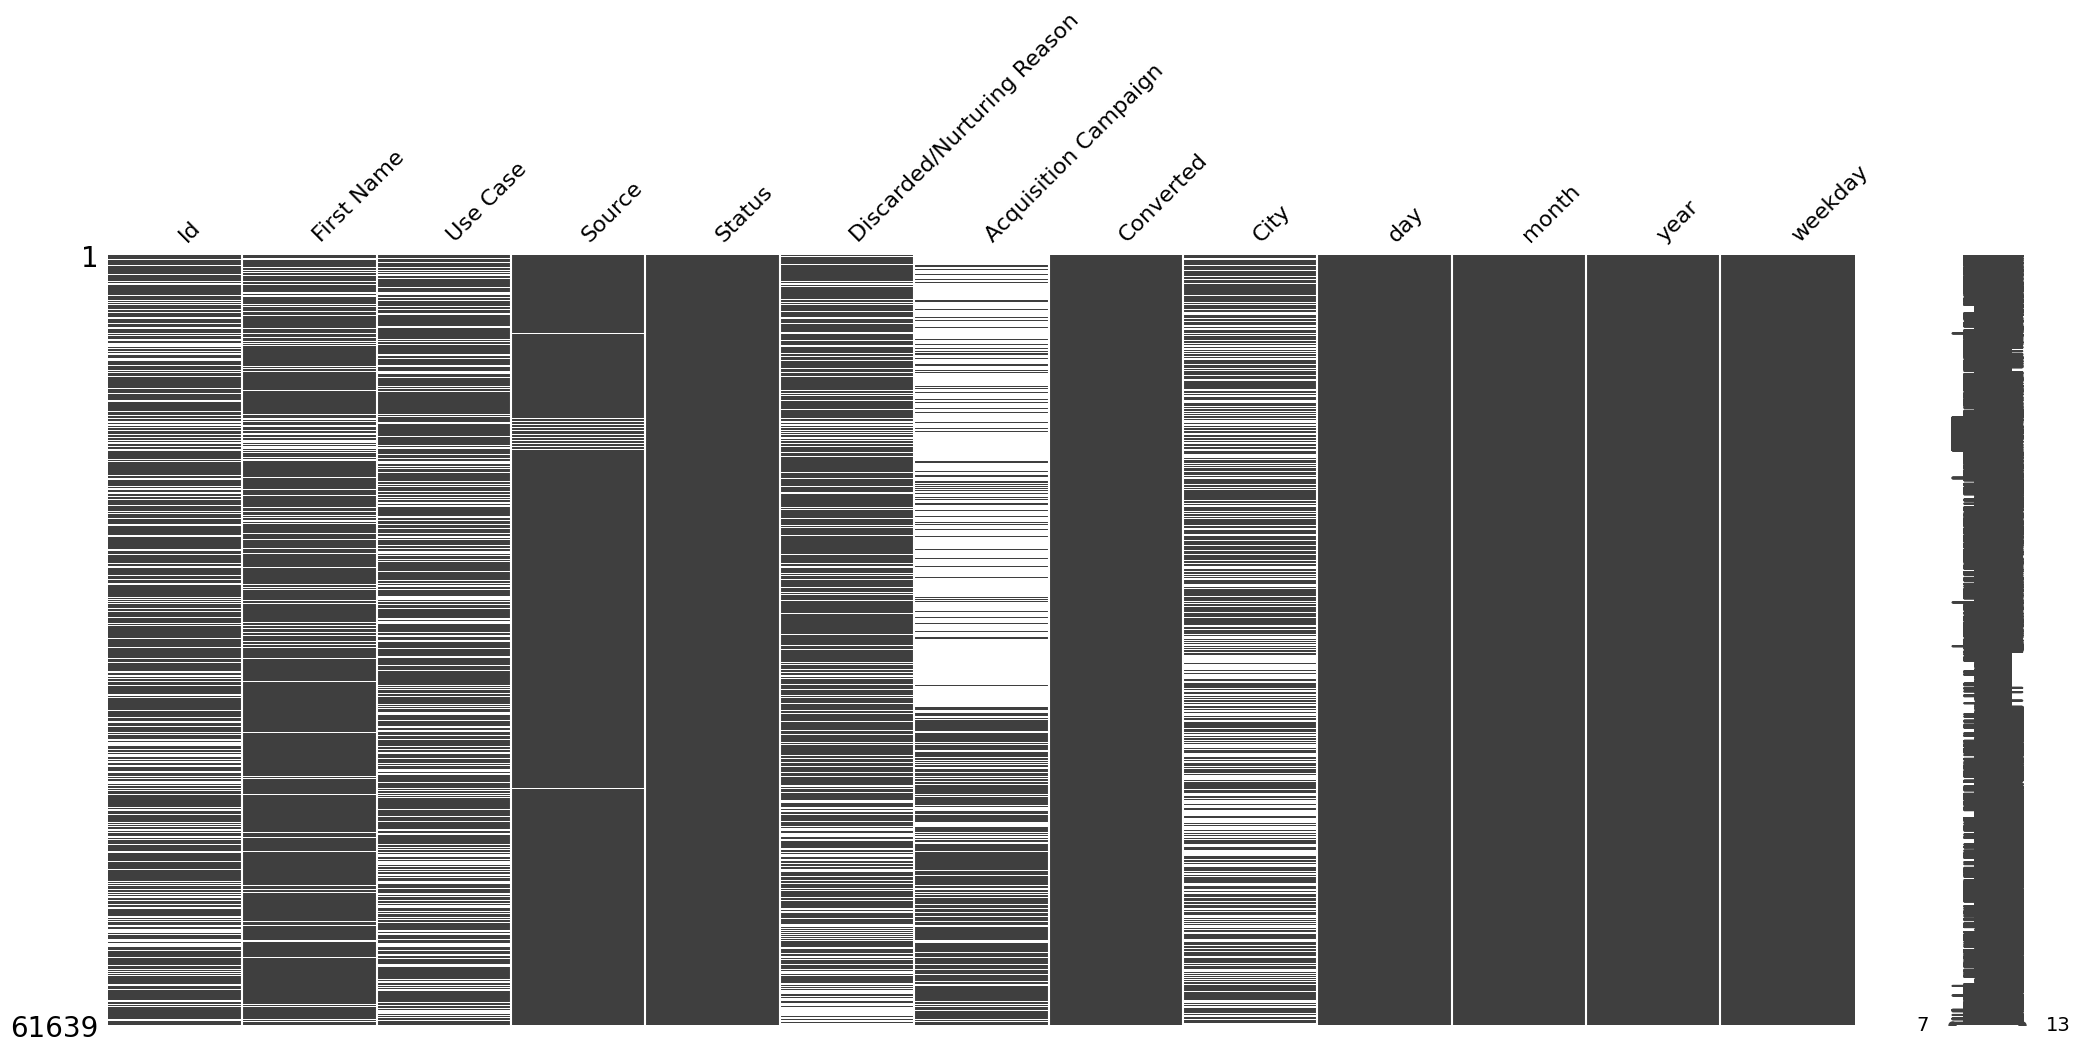

In [49]:
msno.matrix(lead)

<AxesSubplot: >

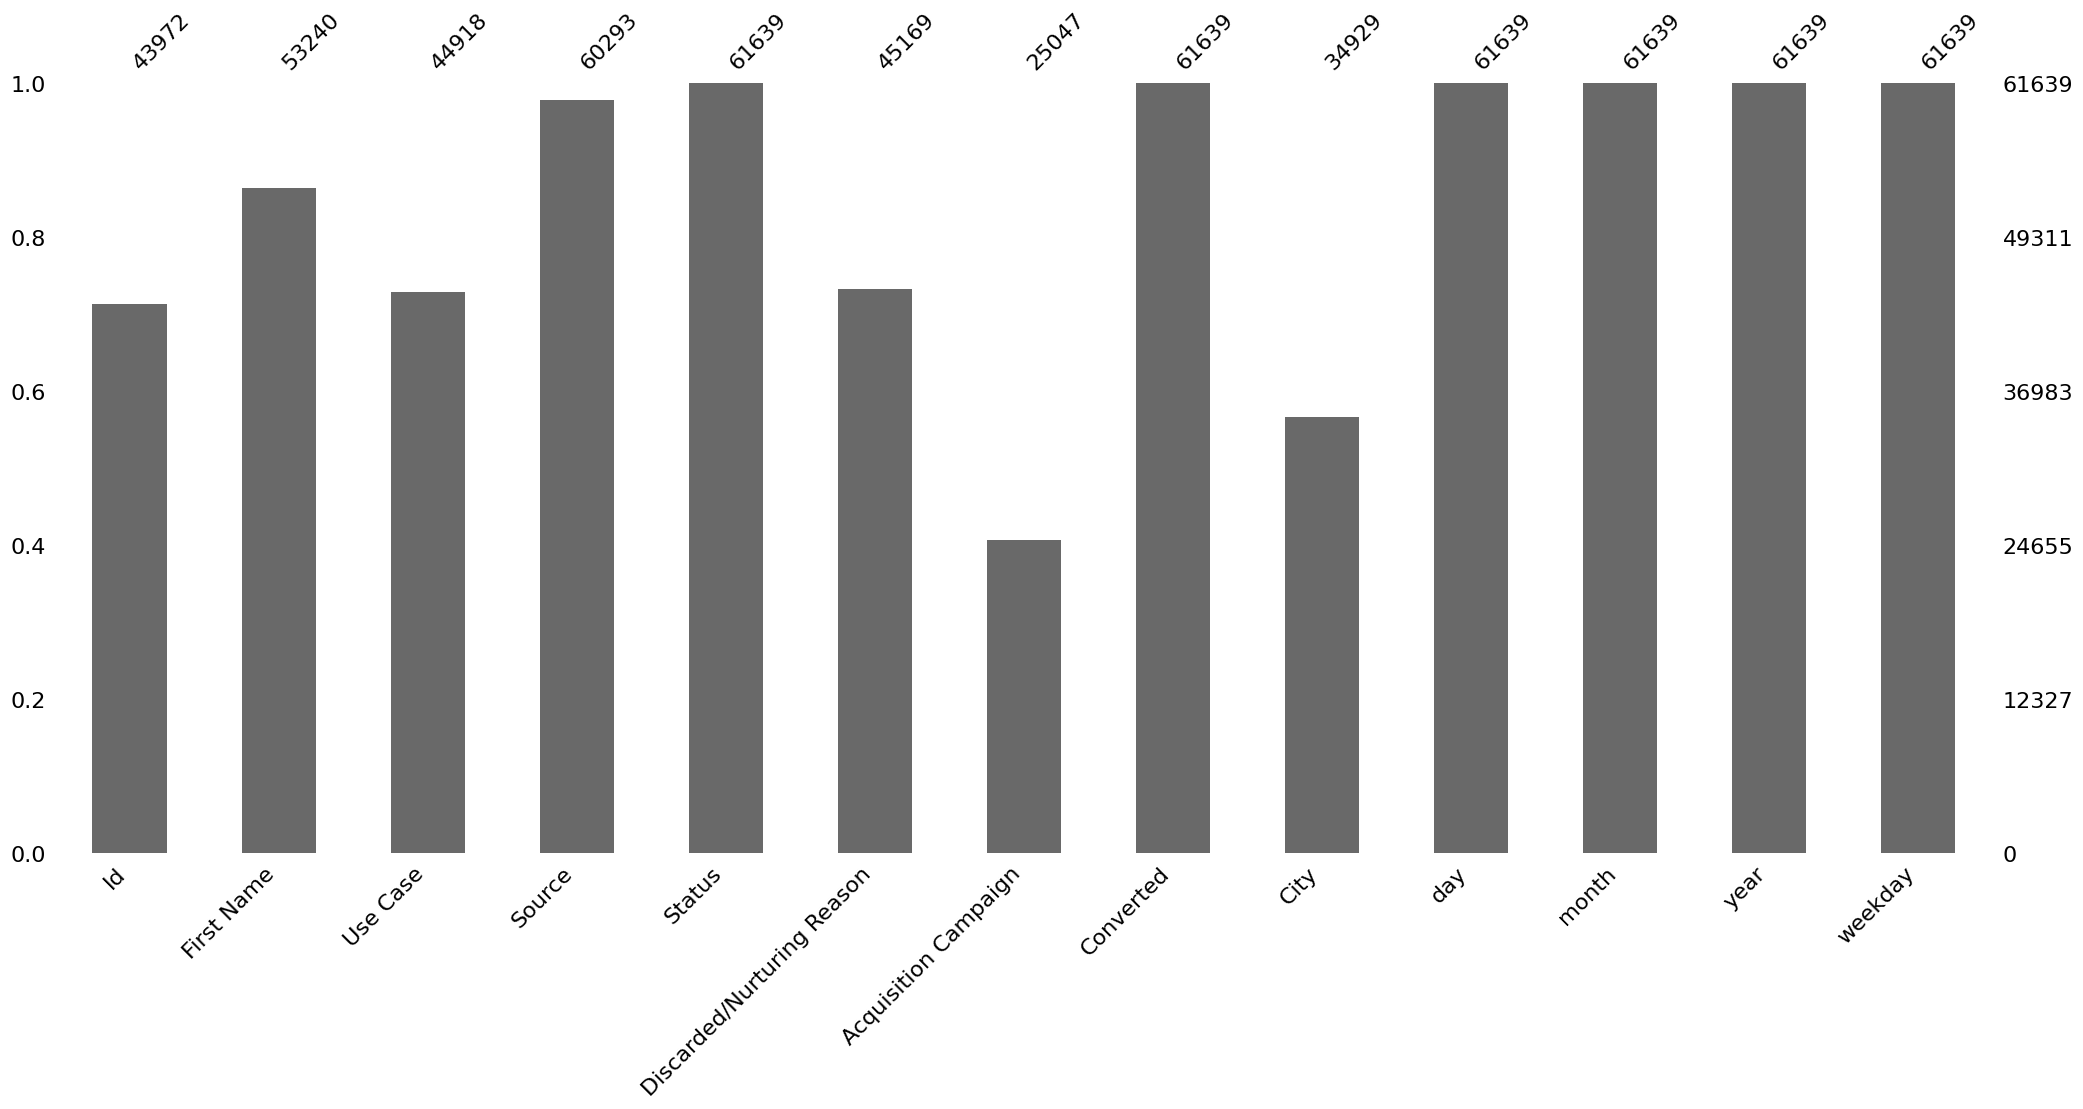

In [50]:
msno.bar(lead)

<AxesSubplot: >

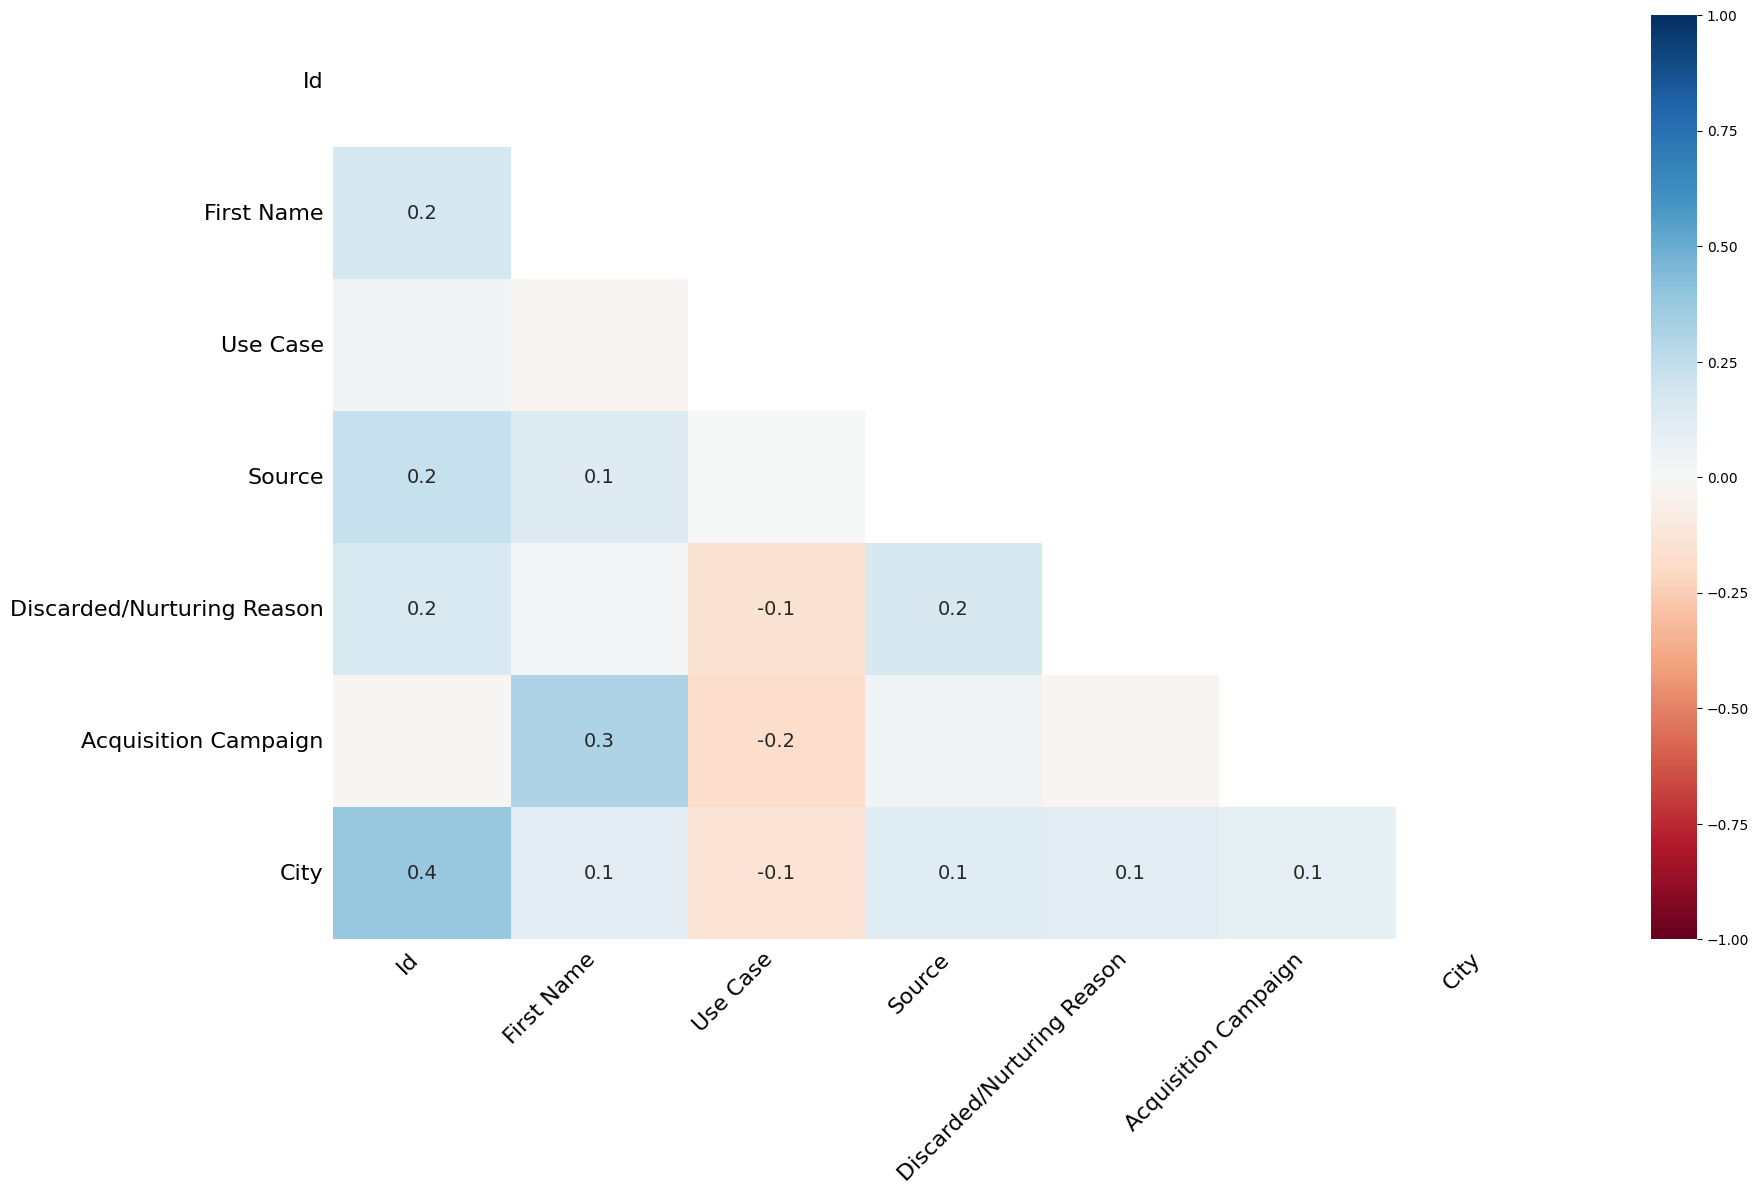

In [51]:
msno.heatmap(lead)

<AxesSubplot: >

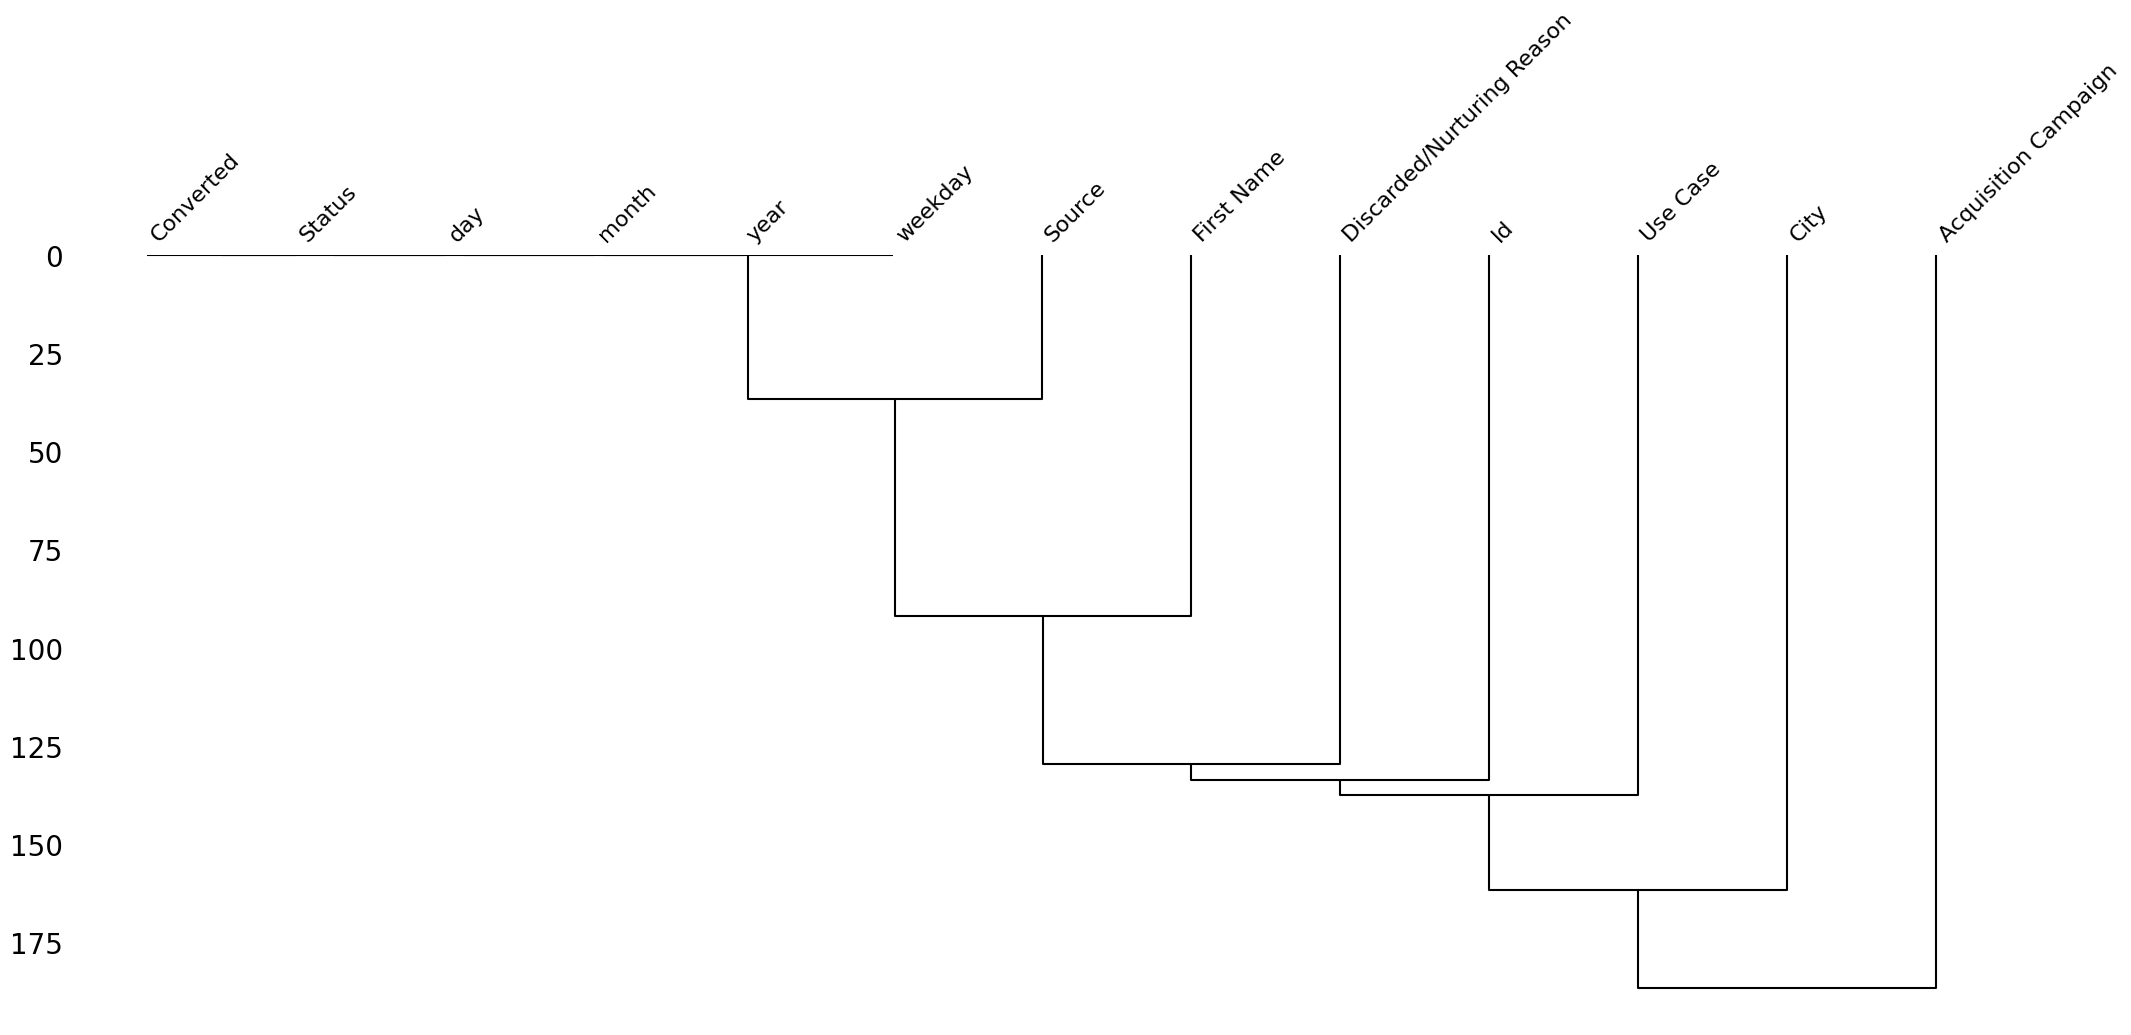

In [52]:
msno.dendrogram(lead)

In [53]:
colums_values_null = lead.columns[lead.isnull().any()].tolist()
colums_values_null

['Id',
 'First Name',
 'Use Case',
 'Source',
 'Discarded/Nurturing Reason',
 'Acquisition Campaign',
 'City']

In [54]:
for column in colums_values_null:
    lead[f"is_null_{column}"] = lead[column].isnull()

# Analisis multivariado

In [55]:
variables_categoricas = list(lead.select_dtypes(include=["object"]).columns)
variables_categoricas += ["Converted", "is_null_Discarded/Nurturing Reason", "is_null_City", "is_null_Acquisition Campaign", "is_null_Source", "is_null_Use Case"]
for variable in variables_categoricas:
    lead[variable] = lead[variable].astype("category")

In [56]:
import association_metrics as am
df = lead.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)
# impute for mode
df = df.apply(lambda x: x.fillna(x.mode()[0]))

In [57]:
from matplotlib import pyplot as plt
cramers_v = am.CramersV(df)


plt.figsize=(30, 30)
test = cramers_v.fit().round(2)
sns.heatmap(test, annot=True)

MemoryError: Unable to allocate 17.4 GiB for an array with shape (2341069280,) and data type int64

<AxesSubplot: >

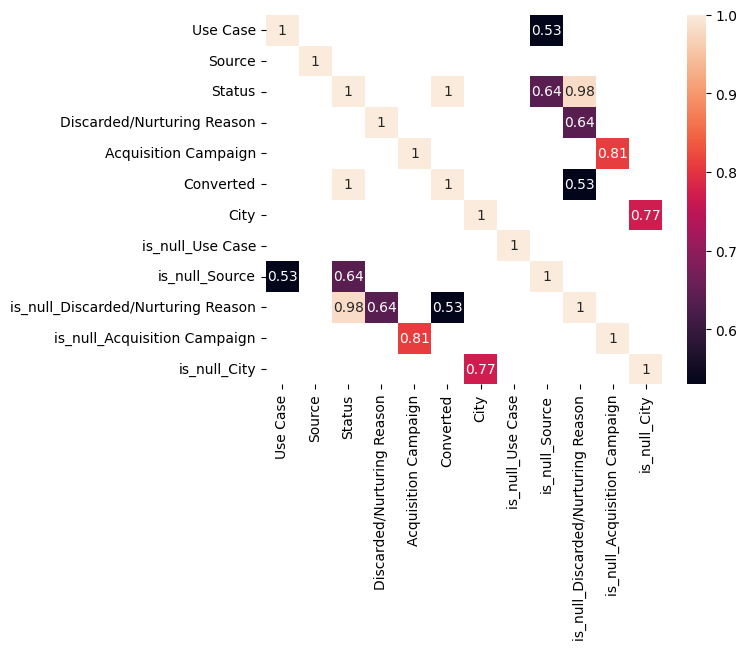

In [ ]:
sns.heatmap(test[test >= 0.5], annot=True)

In [59]:
from ydata_profiling import ProfileReport
profile = ProfileReport(lead)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
dir(profile)

['_ProfileReport__initialize_dataframe',
 '_ProfileReport__validate_inputs',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_description_set',
 '_df_hash',
 '_html',
 '_json',
 '_render_html',
 '_render_json',
 '_render_widgets',
 '_report',
 '_repr_html_',
 '_sample',
 '_summarizer',
 '_type_schema',
 '_typeset',
 '_widgets',
 'compare',
 'config',
 'description_set',
 'df',
 'df_hash',
 'dump',
 'dumps',
 'get_description',
 'get_duplicates',
 'get_rejected_variables',
 'get_sample',
 'html',
 'invalidate_cache',
 'json',
 'load',
 'loads',
 'report',
 'summarizer',
 'to_expectation_suite',
 'to_file',
 'to_html',
 'to_json',
 'to_notebook_ifram

In [107]:
profile.get_description

<bound method ProfileReport.to_html of >

In [71]:
dir(profile.get_description())

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alerts',
 'analysis',
 'correlations',
 'duplicates',
 'missing',
 'package',
 'sample',
 'scatter',
 'table',
 'time_index_analysis',
 'variables']

In [119]:
profile.get_description().time_index_analysis

In [97]:
profile.get_description().variables["Id"]

{'n_distinct': 43972,
 'p_distinct': 1.0,
 'is_unique': True,
 'n_unique': 43972,
 'p_unique': 1.0,
 'type': 'Categorical',
 'hashable': True,
 'value_counts_without_nan': ny2haxy8    1
 nxv238pm    1
 nxwqoxvp    1
 nxx2phfn    1
 nxysc6lk    1
            ..
 bw20dc1g    1
 bw2mb32i    1
 bw4tjzqb    1
 bw7ffywg    1
 hvyzn3fm    1
 Name: Id, Length: 43972, dtype: int64,
 'value_counts_index_sorted': 001g2nhy    1
 002d5oh9    1
 002umohd    1
 004plaq7    1
 005ue764    1
            ..
 zzupfov0    1
 zzwb7m8d    1
 zzxcb4p0    1
 zzxhcs0b    1
 zzzjyxz4    1
 Name: Id, Length: 43972, dtype: int64,
 'ordering': True,
 'n_missing': 17667,
 'n': 61639,
 'p_missing': 0.2866204837846169,
 'count': 43972,
 'memory_size': 1655268,
 'imbalance': -2.220446049250313e-16,
 'first_rows': 0    23okrabh
 2    hbzt0kp1
 3    velluwdq
 5    vwm9vcdc
 8    kbfjr4vz
 Name: Id, dtype: object,
 'chi_squared': {'statistic': 0.0, 'pvalue': 1.0},
 'max_length': 8,
 'mean_length': 8.0,
 'median_length': 